In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/merge.py:18: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)
/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/dataarray.py:1829: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  'DataArray', pd.Series, pd.DataFrame, pd.Panel]:


In [2]:
# 145 neuronal subtypes
use_clusters = [
    'CA1 Ak5', 'CA1 Chrm3', 'CA1 Kif26a', 'CA1 Lingo2', 'CA1 Ptprg',
    'CA3 Cadm2', 'CA3 Efnb2', 'CA3-St18 Epha5', 'CA3-St18 Nuak1',
    'CA3-St18 Tead1', 'CGE-Lamp5 Dock5', 'CGE-Lamp5 Grid1', 'CGE-Lamp5 Grk5',
    'CGE-Lamp5 Nrxn3', 'CGE-Lamp5 Sorcs1', 'CGE-Vip Ccser1', 'CGE-Vip Clstn2',
    'CGE-Vip Fstl4', 'CGE-Vip Galnt17', 'CGE-Vip Grm8', 'CGE-Vip Ntng1',
    'CGE-Vip Ptprm', 'CGE-Vip Robo1', 'CLA Bcl11a', 'CLA Cdh8', 'CLA Nrp2',
    'CT-L6 Hcrtr2', 'CT-L6 Il1rap', 'CT-L6 Map4', 'CT-L6 Megf9', 'Chd7 Kcnc2',
    'Chd7 Megf11', 'Chd7 Trpc7', 'D1L-Fstl4 Cadm1', 'D1L-Fstl4 Crim1',
    'D1L-Fstl4 Grm3', 'D1L-Fstl4 Sipa1l2', 'D1L-Fstl4 Trps1', 'D1L-PAL Flrt2',
    'D1L-PAL Plcxd3', 'DG dg-all', 'DG-po Bcl11a', 'DG-po Calb2',
    'DG-po Kctd8', 'EP Adcy8', 'EP Rgs8', 'EP Tspan5', 'Foxp2 Dchs2',
    'Foxp2 Homer2', 'Foxp2 Inpp4b', 'Foxp2 Trpc7', 'Gfra1 Gfra1',
    'IG-CA2 Chrm3', 'IG-CA2 Peak1', 'IG-CA2 Xpr1', 'IT-L23 Cux1',
    'IT-L23 Foxp1', 'IT-L23 Ptprt', 'IT-L23 Tenm2', 'IT-L4 Astn2',
    'IT-L4 Shc3', 'IT-L5 Cdh8', 'IT-L5 Etv1', 'IT-L5 Grik3', 'IT-L6 Cadps2',
    'IT-L6 Fstl4', 'IT-L6 Man1c1', 'IT-L6 Oxr1', 'L6b Adcy8', 'L6b Kcnk2',
    'L6b Nrp2', 'L6b Pkhd1', 'LSX-Inh Cacna1i', 'LSX-Inh Dock10',
    'LSX-Inh Enox1', 'LSX-Inh Foxp2', 'LSX-Inh Lats2', 'LSX-Inh Nxph1',
    'LSX-Inh Zeb2', 'MGE-Pvalb Cacna1i', 'MGE-Pvalb Cnih3', 'MGE-Pvalb Entpd3',
    'MGE-Pvalb Gfra2', 'MGE-Pvalb Ptprk', 'MGE-Pvalb Sema5a',
    'MGE-Pvalb Thsd7a', 'MGE-Sst Bmper', 'MGE-Sst Chodl', 'MGE-Sst Dock4',
    'MGE-Sst Etv1', 'MGE-Sst Frmd6', 'MGE-Sst Kcnip4', 'MGE-Sst Ptpre',
    'MGE-Sst Rerg', 'MGE-Sst Rxra', 'MGE-Sst Ubtd1', 'MGE-Sst Unc5b',
    'MSN-D1 Hrh1', 'MSN-D1 Khdrbs3', 'MSN-D1 Ntn1', 'MSN-D1 Plxnc1',
    'MSN-D2 Casz1', 'MSN-D2 Col14a1', 'MSN-D2 Nrp2', 'MSN-D2 Slc24a2',
    'NP-L6 Boc', 'NP-L6 Cntnap4', 'NP-L6 Cntnap5a', 'NP-L6 Cyp7b1',
    'NP-L6 Kcnab1', 'NP-L6 Olfml2b', 'OLF Gabbr2', 'OLF Kcnd3', 'OLF Mapk10',
    'OLF Pag1', 'OLF Trpc4', 'OLF Xkr6', 'OLF-Exc Bmpr1b', 'OLF-Exc Cdh9',
    'OLF-Exc Cux2', 'OLF-Exc Lrrtm3', 'OLF-Exc Pld5', 'OLF-Exc Rmst',
    'OLF-Exc Sgcd', 'OLF-Exc Unc13c', 'PAL-Inh Chat', 'PAL-Inh Deptor',
    'PAL-Inh Igdcc3', 'PAL-Inh Meis1', 'PAL-Inh Meis2', 'PAL-Inh Onecut2',
    'PAL-Inh Ptprd', 'PAL-Inh Rarb', 'PAL-Inh Tcf7l2', 'PAL-Inh Tmem178',
    'PT-L5 Abca12', 'PT-L5 Astn2', 'PT-L5 Kcnh1', 'PT-L5 Nectin1',
    'PT-L5 Plcb4', 'PT-L5 Ptprt', 'PT-L5 Tenm2', 'PT-L5 Tmtc2', 'PT-L5 Unc5b',
    'Unc5c Unc5c'
]

In [3]:
global_mch = pd.read_csv('ClusterGlobalmCH.csv', header=None, index_col=0, squeeze=True)
global_mcg = pd.read_csv('ClusterGlobalmCG.csv', header=None, index_col=0, squeeze=True)

In [4]:
gene_rate = xr.open_dataset(
    '/home/hanliu/project/mouse_rostral_brain/study/mCClustermCLevel/SubType.geneslop2k.mcds'
)['gene_cluster_da_rate'].sel(dict(mc_type='CGN', SubType=use_clusters))
gene_rate_df = gene_rate.to_pandas().T

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/dataarray.py:1849: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  3: pd.Panel}


In [5]:
total_dmg = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusterMethylMarker/SubTypePairwiseDEG/TotalGeneID.txt',
    index_col=0, header=None
).index

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


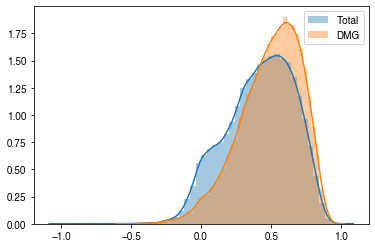

In [6]:
gene_corr_with_global_mcg = gene_rate_df.corrwith(global_mcg, axis=1)
gene_corr_with_global_mcg.to_csv('GeneCGCorrWithGlobalmCG.csv', header=False)
sns.distplot(gene_corr_with_global_mcg.dropna(), label='Total')

gene_corr_with_global_mcg = gene_rate_df.loc[total_dmg].corrwith(global_mcg, axis=1)
ax = sns.distplot(gene_corr_with_global_mcg.dropna(), label='DMG')

ax.legend()

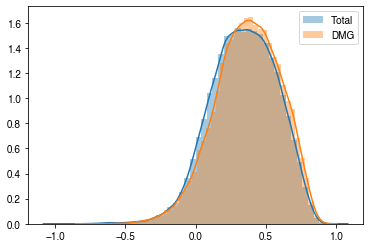

In [7]:
gene_corr_with_global_mch = gene_rate_df.corrwith(global_mch, axis=1)
gene_corr_with_global_mch.to_csv('GeneCGCorrWithGlobalmCH.csv', header=False)
sns.distplot(gene_corr_with_global_mch.dropna(), label='Total')

gene_corr_with_global_mch = gene_rate_df.loc[total_dmg].corrwith(global_mch, axis=1)
ax = sns.distplot(gene_corr_with_global_mch.dropna(), label='DMG')

ax.legend()

In [8]:
global_mcg.corr(global_mch)

0.7857395216408454